# One Variable Equations

Throughout this section and the next ones we shall cover the topic of solutions to one variable equations. Many different problems in physics and astronomy require the use of complex expressions, even with implicit dependence of variables. When it is necessary to solve for one of those variable, an analytical approach is not usually the best solution, because of its complexity or even because it does not exist at all. Different approaches for dealing with this comprehend series expansions and numerical solutions. Among the most widely used numerical approaches are the Bisection or Binary-search method, fixed-point iteration, Newton's methods.


- - -
- [Bisection Method](#Bisection-Method) 
    - [Steps](#Steps-BM)
    - [Stop condition](#Stop-condition-BM)
    - [Error analysis](#Error-analysis-BM)
    - [Example 1](#Example-1)

- [Newton-Raphson Method](#Newton-Raphson-Method)
    - [Derivation](#Derivation-NM)
    - [Steps](#Steps-NM)
    - [Example 2](#Example-2)
    - [Stop condition](#Stop-condition-NM)
    - [Convergence](#Convergence-NM)
    
- [Secant Method](#Secant-Method)
    - [Derivation](#Derivation-SM)
    - [Steps](#Steps-SM)

- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


- - - 

# Bisection Method

The Bisection method exploits the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem), where a continuous and differentiable function $f$ must have a zero between an interval $[a,b]$ such that $f(a)f(b)<0$, or equivalently, there must be a value $p\in[a,b]$ such that $f(p)=0$. Below the algorithmm is stated explicitly.

## Steps BM

<div style="float: right;" markdown="1">
    <img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/300px-Bisection_method.svg.png">
</div>


1. There must be selected two values $a$ and $b$ such that $f(a)f(b)<0$ and $p\in[a,b]$ where $f(p)=0$. In other words, though we do not know the value of the root, we must know that there is at least one within the selected interval.

2. To begin, it must be set $a_1=a$ and $b_1=b$.

3. Calculate the mid-point $p_1$ as

    $$p_1 = a_1 + \frac{b_1-a_1}{2} = \frac{a_1+b_1}{2}$$

4. Evaluate the function in $p_1$, if the [stop condition](#Stop-Condition) is true, go to step 6.

5. If the [stop condition](#Stop-Condition) is not satisfied, then:

    1. If $f(p_1)f(a_1) > 0$, $p\in(p_1,b_1)$. Then set $a_2=p_1$ and $b_2=b_1$

    2. If $f(p_1)f(a_1) < 0$, $p\in(a_1,p_1)$. Then set $a_2=a_1$ and $b_2=p_1$

    3. Go to step 3 using $p_2$, $a_2$ and $b_2$ instead of $p_1$, $a_1$ and $b_1$. For next iterations the index increases until the [stop condition](#Stop-Condition) is reached.

6. The End!

## Stop condition BM

There are several different stop conditions for this algorithm. The most used are stated below:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

All these conditions should lead to a desired convergence expressed by the $\epsilon$ value. However, the first and the third conditions present some problems when the function has a derivative very large or close to $0$ as evaluated in the root value. When the function is very inclined, the first condition fails as a convergence in the $x$ axis does not guarantee a convergence in the $y$ axis, so the found root $p$ may be far from the real value. When the function is very flat ($dF/dx\rightarrow 0$), the third condition fails due to an analogous reason.

A final stop condition that does not have mathematical motivation yet computational is a maximum number of allowed iterations. This condition should be used not only for this algorithm but for all iteration-based numerical methods. This condition guarantees a finite computing time and prevents undesired infinite bucles.

* If $N>N_{max}$, stop!

## Error analysis BM

If we suppose $f\in C[a,b]$ and $f(a)f(b)<0$, the Bisection method generates a sequence of numbers $\left\{p_i\right\}_{i=1}^\infty$ approximating a root $p$ of $f$ as:

$$|p_i-p|\leq \frac{b-a}{2^n},\ \ \ \ \ i\geq 1$$

From this, we can conclude the convergence rate of the method is

$$p_i = p + \mathcal{O}\left( \frac{1}{2^i} \right)$$

This expression allows us to estimate the maximum number of required iterations for achieving a desired precision. The next figure sketches the number of iterations required for some precision.

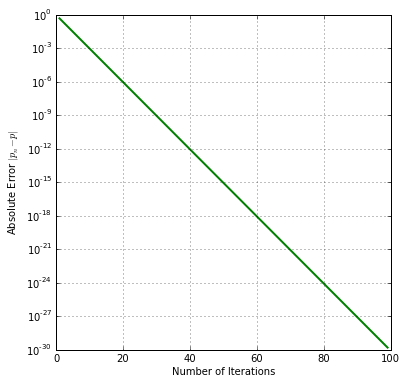

In [2]:
#Array of iterations
Niter = np.arange( 1, 100, 1 )

plt.figure( figsize=(6,6) )
plt.semilogy( Niter, 2.0**-Niter, color="green", lw = 2 )
plt.grid(True)
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error $|p_n-p|$")

## Example 1

Find the root of the function $f$

$f(x) = x^3 - 2$

for $20$ iterations, show the result and the relative error in each iteration.

In [2]:
#Defining Bisection function

def Bisection(f,a,b,Niter):
    
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print "f(a) and f(b) must have opposite sign "
        return False
    
    #Assigning the current extreme values, STEP2
    an = a 
    bn = b
    
    #Iterations
    n = 1
    while( n <= Niter ):
        #Bisection, STEP3
        pn = ( an + bn )/2.0
        #Evaluating function in pn, STEP4 and STEP5
        if f(an)*f(pn) > 0:  
            an = pn 
        else: 
            bn = pn
        #Condition C: repeat the cycle    
        n += 1
        
    #Final result
    return  pn 

In [21]:
#Defining function
def function(x):
    f = x**3.0 - 2.0
    return f

#Finding the root of the function. The real root is 2**(1/3), so a & b should enclose this value
a = 0.0
b = 2.0
Nmax = 20

result = Bisection(function, a, b, Nmax)
print "Bisection result after %d iterations"%Nmax, result
print "Real value:", 2**(1/3.0)
print "Absolute error", abs((2**(1/3.0)-result))

Bisection result after 20 iterations 1.25992012024
Real value: 1.25992104989
Absolute error 9.29655615378e-07


Using the error analysis, we can predict the produced error at $20$ iterations by computing:

$$ \left( \frac{1}{2^{20}}\right) \approx 9.53674316\times 10^{-7} $$

This value is very close to the obtained relative error.

If we were interested in a double precision, i.e. $\epsilon \sim 10^{-17}$, the number of required iterations would be:

$$ 10^{-17} = \left( \frac{1}{2^{N}}\right) \longrightarrow N = \frac{17}{\log_{10}(2)} \approx 56 $$

### <font color='red'> ACTIVITY </font>

<font color='red'>
In an IPython notebook, copy the last function and find the first solution to the equation
    
$ 7 = \sqrt{x^2+1}+e^x\sin x $
    
CLUE: this solution is within the interval $[0,2]$.
</font>

## Exercise 

In orbital mechanics, when solving the central-force problem it becomes necessary to solve the Kepler's equation. This is a transcendental equation that relates the orbital parameters of the trajectory.

*Kepler equation:* $M = E - \epsilon \sin E$

where $M$ is the mean anomaly, $E$ the eccentric anomaly and $\epsilon$ the eccentricity. The mean anomaly can be computed with the expression

$$M = n\ t = \sqrt{ \frac{GM}{a^3} } t$$

where $n$ is the mean motion, $G$ the gravitational constant, $M$ the mass of the central body and $a$ the semi-major axis. $t$ is the time where the position in the trajectory will be computed.

The coordinates $x$ and $y$ as time functions can be recovered by means of the next expressions

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

where $b = a \sqrt{1-\epsilon^2}$ is the semi-minor axis of the orbit and the implicit time-dependence of the eccentric anomaly $E$ is computed through the Kepler's equation.

**Problem:**

For a stallite orbiting the earth in a equatorial trajectory with eccentricity $\epsilon = 0.5$ at a geostationary distance for the semi-major axis, tabulate the positions $x$ and $y$ within the orbital plane in intervals of $15$ min during $5$ hours.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$

- $M_{\oplus} = 5.972\times 10^{24}$ kg

- - -

# Newton-Raphson Method

Although Bisection is an good algorithm, the Newton-Raphson method is an acceletared convergent scheme where the roots of a function are easily found with just a few iterations.

## Derivation NM

Although this method can be presented from an algorithmic point of view, the mathematical deduction is very useful as it allows us to understand the essence of the approximation as well as estimating easily the convergence errors.

Let be $f(x)$ a continuous and differentiable function defined within an interval $[a,b]$ (i.e. $f\in \mathcal{C}^2[a,b]$), and $p$ is a root of the function such that $f(p) = 0$. If we give an initial an enough close guess $p_0$ to this root, such that $|p-p_0|<\epsilon$, where $\epsilon$ is adequately small, we can expand the function by using a second order taylor serie, yielding:

$$f(p) = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2}f''(p_0) + \mathcal{O}^3(|p-p_0|)$$

but as $f(p) = 0$ and $|p-p_0|^2<\epsilon^2$ is an even smaller quantity, we can readily neglect from second order terms, obtaining

$$p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1$$

If we repeat this process but now using $p_1$ as our guess to the root instead of $p_0$ we shall obtain:

$$p \approx p_1 - \frac{f(p_1)}{f'(p_1)} \equiv p_2$$

and so...

$$p \approx p_n - \frac{f(p_n)}{f'(p_n)} \equiv p_{n+1}$$

where each new iteration is a better approximation to the real root.

## Steps NM

1. Take your function $f(x)$ and derive it, $f'(x)$.
2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

In [3]:
#Defining Newton Method
def NewtonRaphson_Animation( f, fp, pini, Nmax, xmin, xmax ):
    #Initial condition
    p = [pini,]
    p_dash = []
    p_der = []
    #Iterations
    for n in xrange(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )
    
    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )
    
    print "Result:", p[-1]
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Horizontal line
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative
    
    def animate(i):
        #Setting new data
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

## Example 2

Find one root of the function:

$f(x) = x^2 - x$

with derivative

$f'(x) = 2x -1$

using the Newton-Raphson method.

Result: 1.0



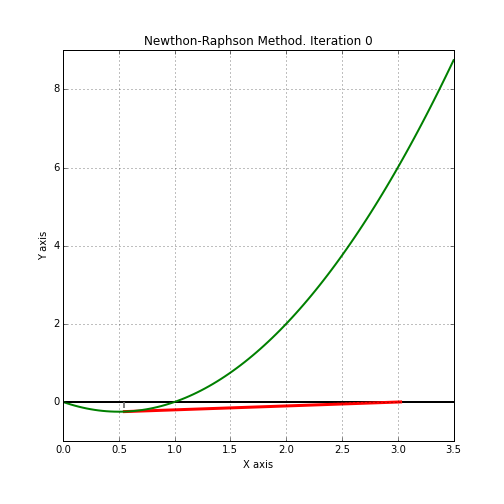
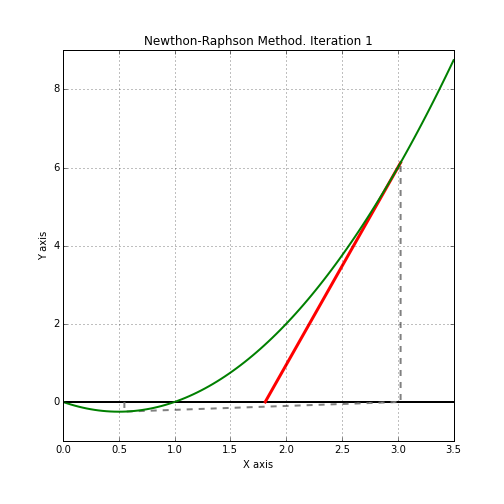
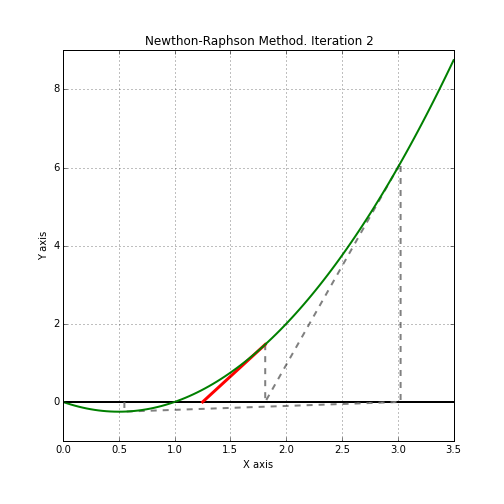
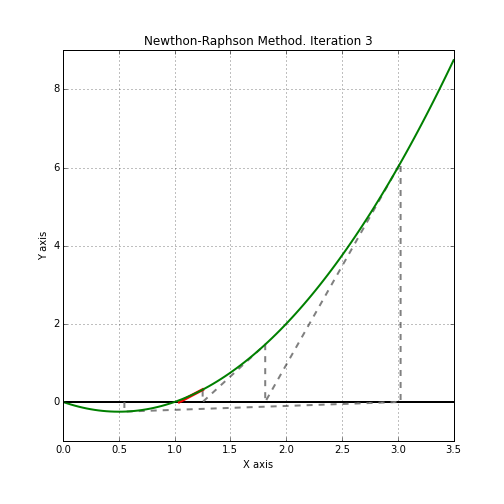
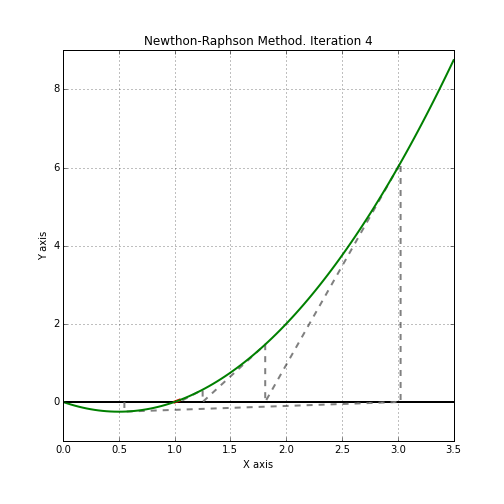
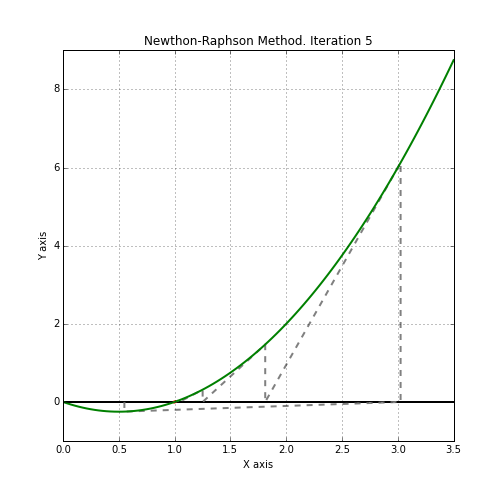
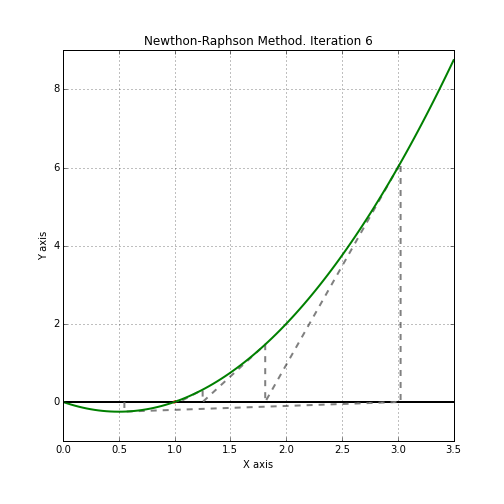
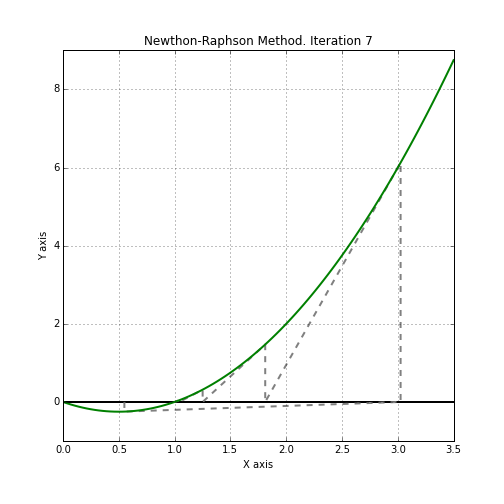
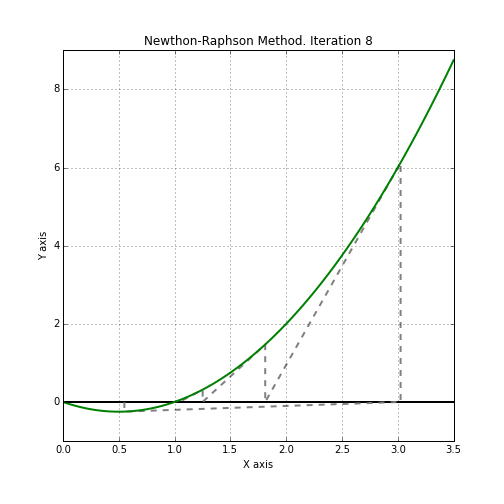
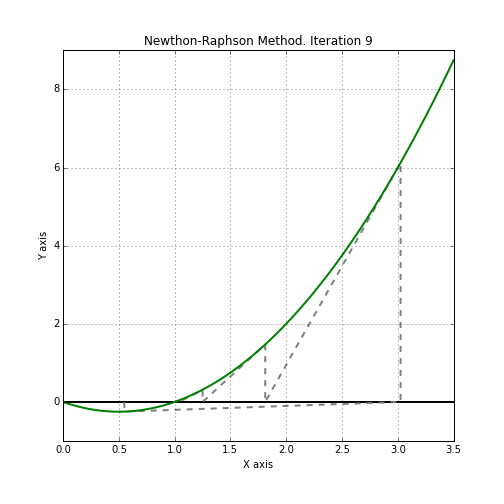

In [4]:
#Defining the function
def f(x): 
    return x**2-x
#Defining the derivative
def df(x): 
    return 2*x-1
#Calculating root
NewtonRaphson_Animation( f, df, pini = 0.55, Nmax = 10, xmin = 0, xmax = 3.5 )

## Stop conditions NM

The stop conditions are the same than Bisection:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

## Convergence NM

It is possible to demonstrate by means of the previous derivation procedure, that the convergence of the Newton-Raphson method is quadratic, i.e., if $p$ is the exact root and $p_n$ is the $n$-th iteration, then

$$|p_{n+1}-p|\leq C |p_n-p|^2$$

for a fixed and positive constant $C$.

This implies, if the initial guess is good enough such that |p_0-p| is small, the convergence is achieved very fast as each iteration improves the precision twice in the order of magnitude, e.g., if $|p_0-p|\sim 10^{-1}$, $|p_1-p|\sim 10^{-2}$, $|p_2-p|\sim 10^{-4}$, $|p_2-p|\sim 10^{-8}$ and so.

In [105]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax ):
    #Initial condition
    p = pini
    #Iterations
    for n in xrange(Nmax):
        p = p - f(p)/fp(p)
    #Final result
    return p

<font color='red'>
**ACTIVITY**
    
In an IPython notebook, copy the latter routine NewtonRaphson and the Bisection routine provided in this notebook  and find the root of the next function using the two methods.
    
$f(x) = x - \cos(x)$
    
Plot in the same figure the convergence of each method as a function of the number of iterations.
</font>

- - -

# Secant Method

The Newton-Raphson method is highly efficient as the convergence is accelerated, however there is a weakness with it: one needs to know the derivative of the function beforehand. This aspect may be complicated when dealing with numerical functions or even very complicated analytical functions. Numerical methods to derive the input function can be applied, but this extra procedure may involve an extra computing time that compensates the time spent by using other methods like Bisection.

## Derivation SM

Retaking the iterative expression obtained from the Newton-Raphson method:

$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

the derivative can be approximated as

$$f'(p_n) = \lim_{x\rightarrow p_n} \frac{f(x)-f(p_n)}{x-p_n} $$

As we know, the convergence of the NR method is quadratic, so $p_{n-1}$ should be close enough to $p_n$ such that one can assume $p_{n-1}\rightarrow p_n$ and the previous term is:

$$f'(p_n) \approx \frac{f(p_{n})-f(p_{n-1})}{p_{n}-p_{n-1}} $$

The final expression for the $n$-th iteration of the root is then:

$$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

In this consists the Secant method, what is just an approximation to the Newton-Raphson method, but without the derivative term.

## Steps SM

1. Give the input function $f(x)$.
2. Give two guests to the solution (root of $f(x)$). These values would be the seeds $p_0$, $p_1$.
3. The next guest to the solution will be given by

    $$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

<font color='red'>
**ACTIVITY**
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

- - -